In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('India_GDP_1980_2023.csv')
df

,Year,GDP in PPP Billion USD,GDP per capita USD,GDP in nominal Billion USD,GDP per capita nominal USD,Growth %,Inflation rate
0,1980,371.9,532,189.4,271,5.30%,11.30%
1,1981,431.5,603.2,196.5,274.7,6.00%,12.70%
2,1982,474.1,647.5,203.5,278,3.50%,7.70%
3,1983,528.6,705.3,222,296.3,7.30%,12.60%
4,1984,568.6,741.4,215.6,281.1,3.80%,6.50%
5,1985,617.4,787.1,237.6,302.9,5.30%,6.30%
6,1986,659.9,822.8,252.8,315.2,4.80%,8.90%
7,1987,703,857.7,283.8,346.2,4.00%,9.10%
8,1988,797.9,952.7,299.6,357.8,9.60%,7.20%
9,1989,878.5,"1,027.00",301.2,352.2,5.90%,4.60%


# Data Pre-processing

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Year                          0
GDP in PPP Billion USD        0
GDP per capita USD            0
GDP in nominal Billion USD    0
GDP per capita nominal USD    0
Growth %                      0
Inflation rate                0
dtype: int64


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Replace '%' in percentage columns, convert to float, and divide by 100
percentage_features = ['Growth %', 'Inflation rate']

In [6]:
for feature in percentage_features:
    df[feature] = pd.to_numeric(df[feature].str.rstrip('%'), errors='coerce') / 100

In [7]:
# Replace commas in numerical columns and convert to float
numerical_features = ['GDP in PPP Billion USD', 'GDP per capita USD', 'GDP in nominal Billion USD', 'GDP per capita nominal USD']

In [8]:
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature].str.replace('[^\d.]', '', regex=True), errors='coerce')

In [9]:
columns_to_scale = numerical_features + percentage_features

In [10]:
# Now you can apply Min-Max scaling
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [11]:
df

,Year,GDP in PPP Billion USD,GDP per capita USD,GDP in nominal Billion USD,GDP per capita nominal USD,Growth %,Inflation rate
0,1980,0.000000,0.000000,0.000000,0.000000,0.689441,0.782178
1,1981,0.004707,0.008336,0.002001,0.001588,0.732919,0.920792
2,1982,0.008072,0.013523,0.003975,0.003004,0.577640,0.425743
3,1983,0.012376,0.020290,0.009190,0.010857,0.813665,0.910891
4,1984,0.015535,0.024517,0.007385,0.004334,0.596273,0.306931
5,1985,0.019389,0.029868,0.013587,0.013689,0.689441,0.287129
6,1986,0.022746,0.034048,0.017872,0.018967,0.658385,0.544554
7,1987,0.026150,0.038134,0.026610,0.032269,0.608696,0.564356
8,1988,0.033645,0.049257,0.031064,0.037247,0.956522,0.376238
9,1989,0.040011,0.057956,0.031515,0.034844,0.726708,0.118812


In [12]:
# Save the processed data to a CSV file
df.to_csv('processed_data.csv', index=False)

# EDA

In [13]:
# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              Year  GDP in PPP Billion USD  GDP per capita USD  \
count    44.000000               44.000000           44.000000   
mean   2001.500000                0.270986            0.297245   
std      12.845233                0.277289            0.279624   
min    1980.000000                0.000000            0.000000   
25%    1990.750000                0.049137            0.068947   
50%    2001.500000                0.146969            0.178796   
75%    2012.250000                0.463008            0.512610   
max    2023.000000                1.000000            1.000000   

       GDP in nominal Billion USD  GDP per capita nominal USD   Growth %  \
count                   44.000000                   44.000000  44.000000   
mean                     0.262360                    0.272757   0.740119   
std                      0.294365                    0.303151   0.170163   
min                      0.000000                    0.000000   0.000000   
25%  

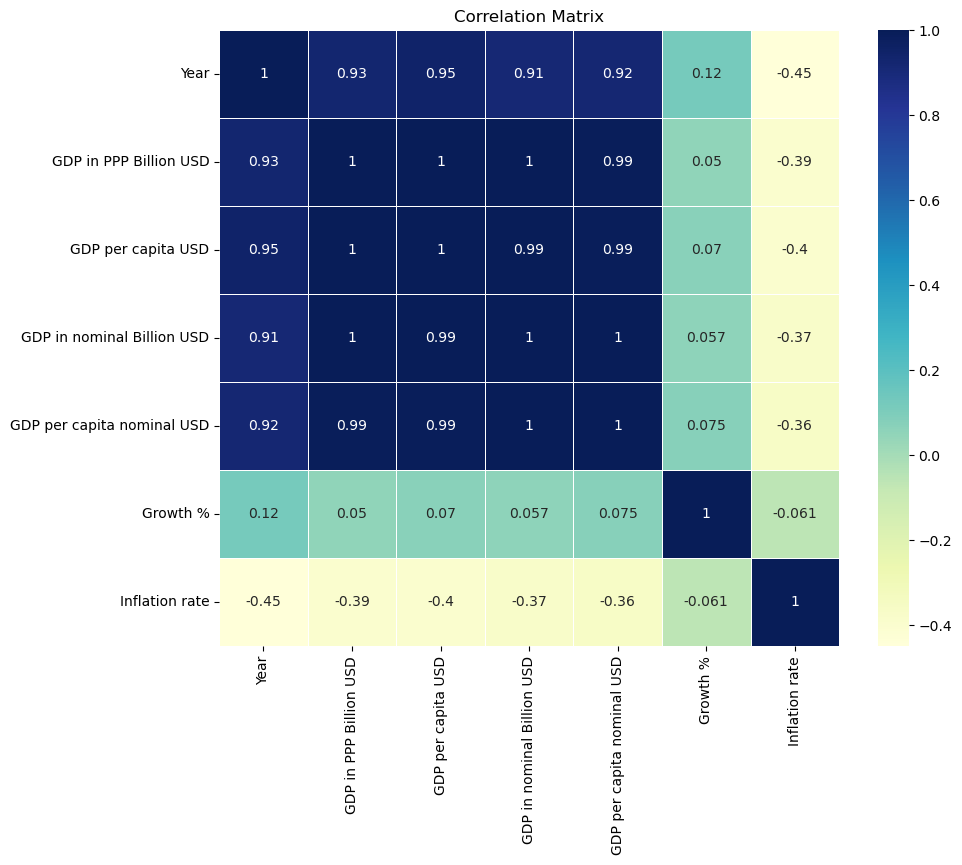

In [14]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [15]:
# Time Series Analysis (if applicable)
# For time series analysis, you can use your 'Year' column as the index.
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

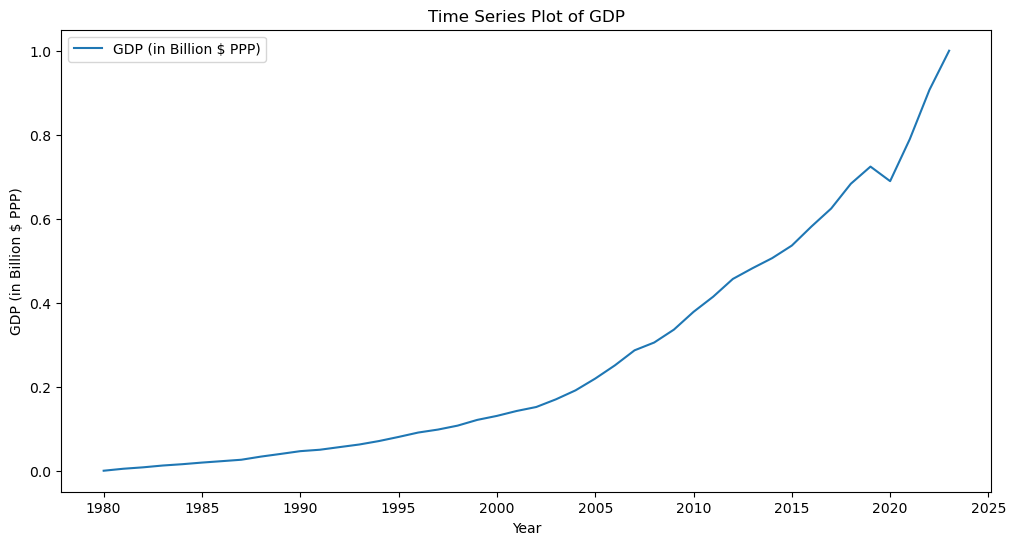

In [16]:
# Time Series Plot for GDP
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GDP in PPP Billion USD'], label="GDP (in Billion $ PPP)")
plt.xlabel('Year')
plt.ylabel('GDP (in Billion $ PPP)')
plt.title('Time Series Plot of GDP')
plt.legend()
plt.show()

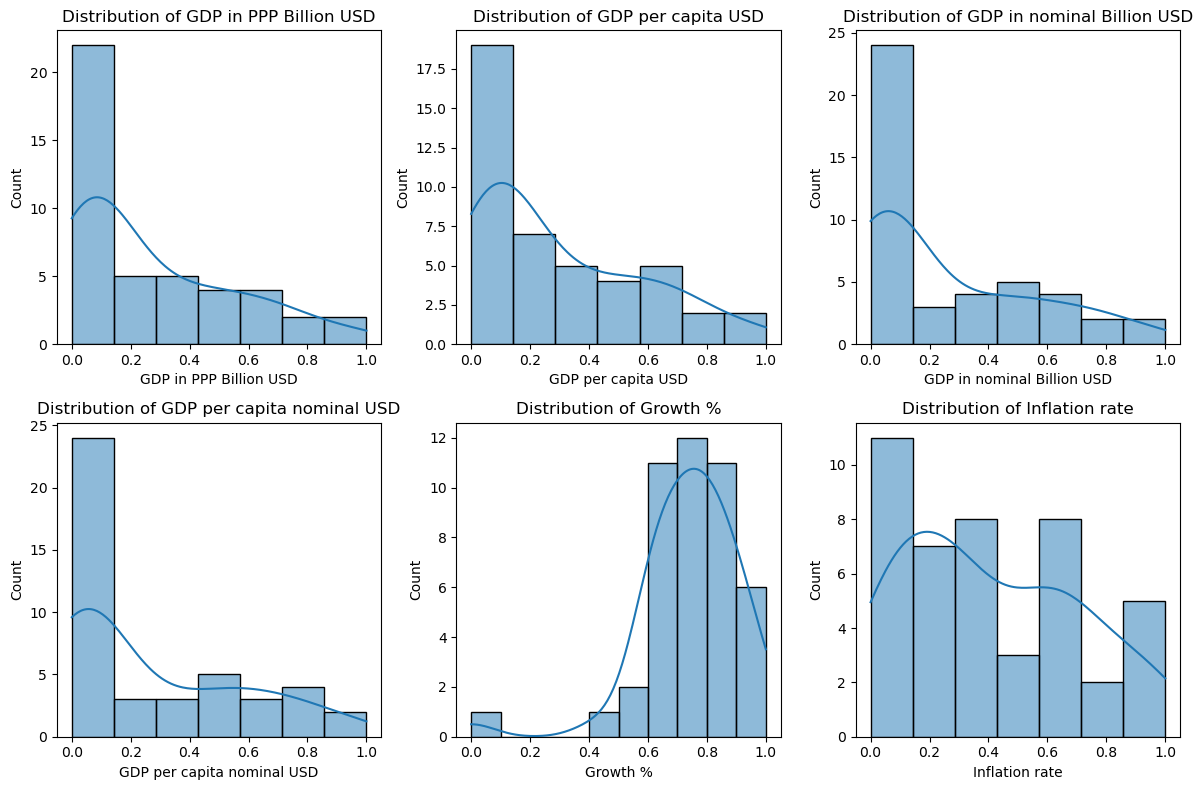

In [17]:
# Histograms and Distribution Plots
plt.figure(figsize=(12, 8))
for feature in df.columns:
    plt.subplot(2, 3, list(df.columns).index(feature) + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

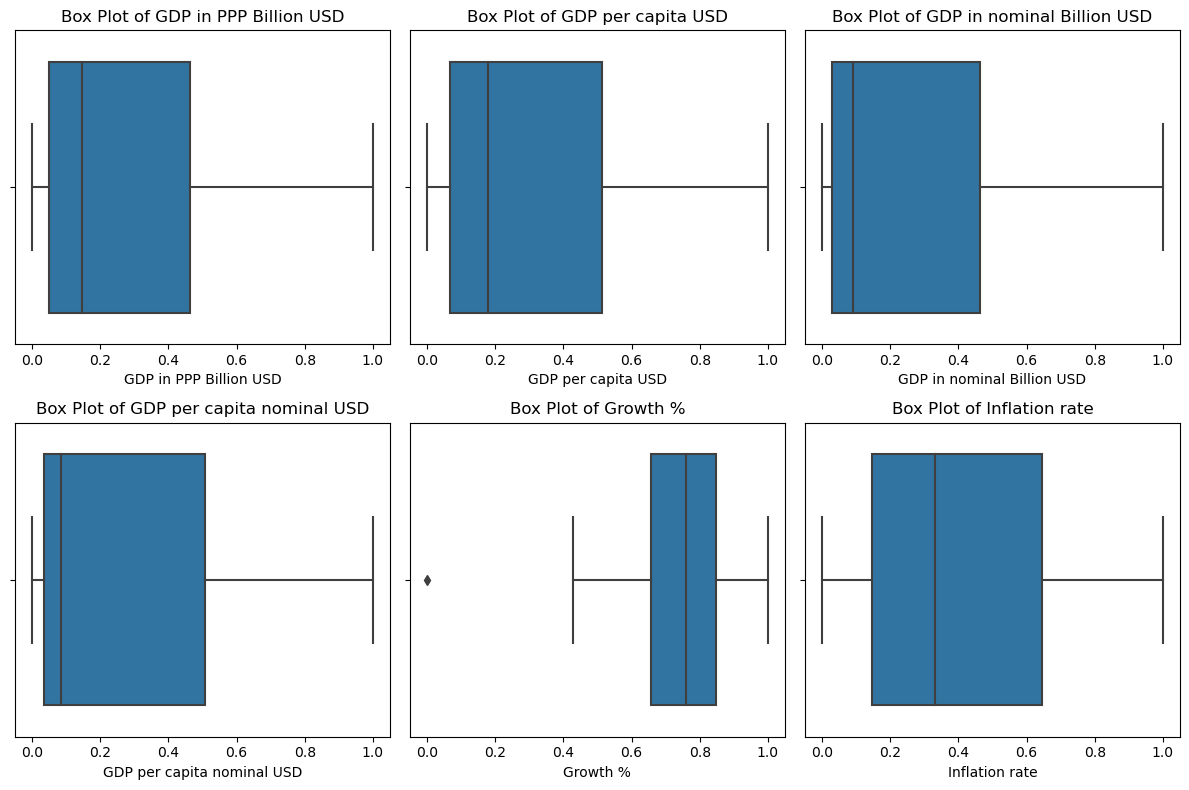

In [18]:
# Box Plots
plt.figure(figsize=(12, 8))
for feature in df.columns:
    plt.subplot(2, 3, list(df.columns).index(feature) + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

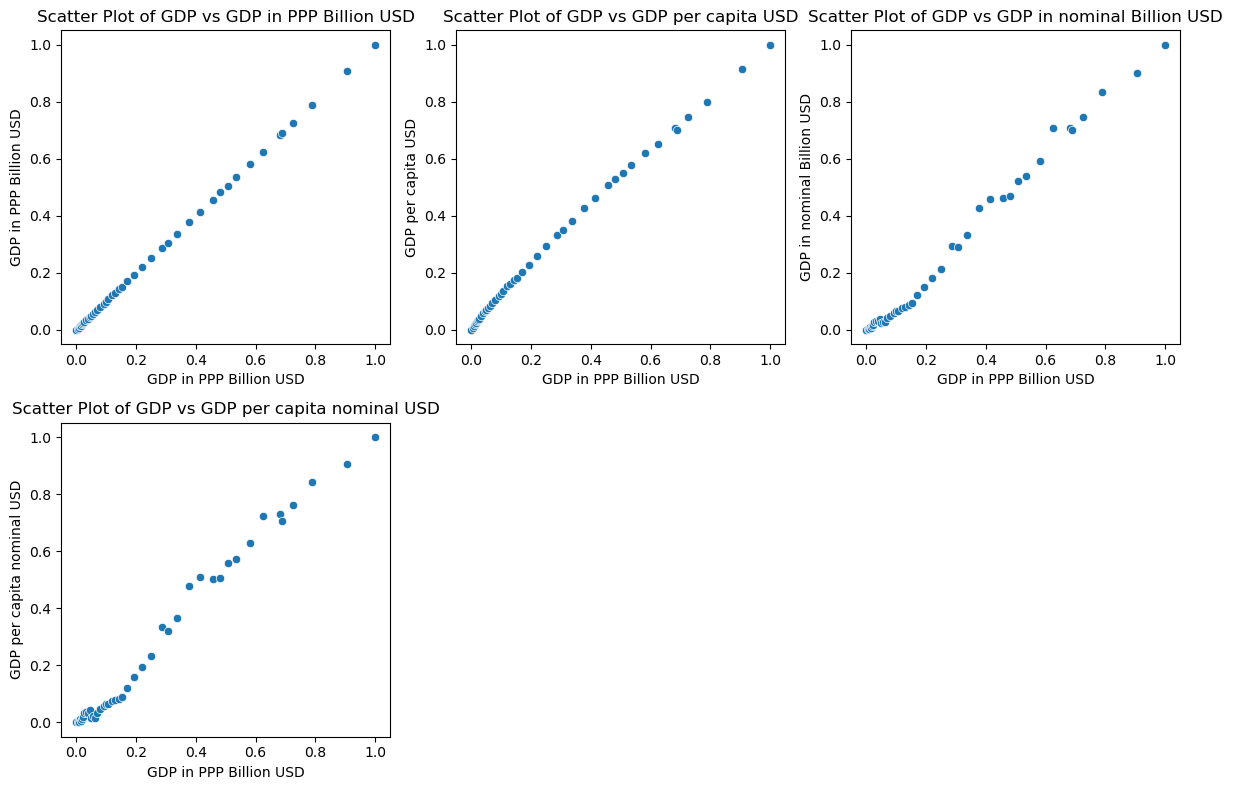

In [19]:
# Scatter Plots
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 3, list(numerical_features).index(feature) + 1)
    sns.scatterplot(data=df, x='GDP in PPP Billion USD', y=feature)
    plt.title(f'Scatter Plot of GDP vs {feature}')
plt.tight_layout()
plt.show()

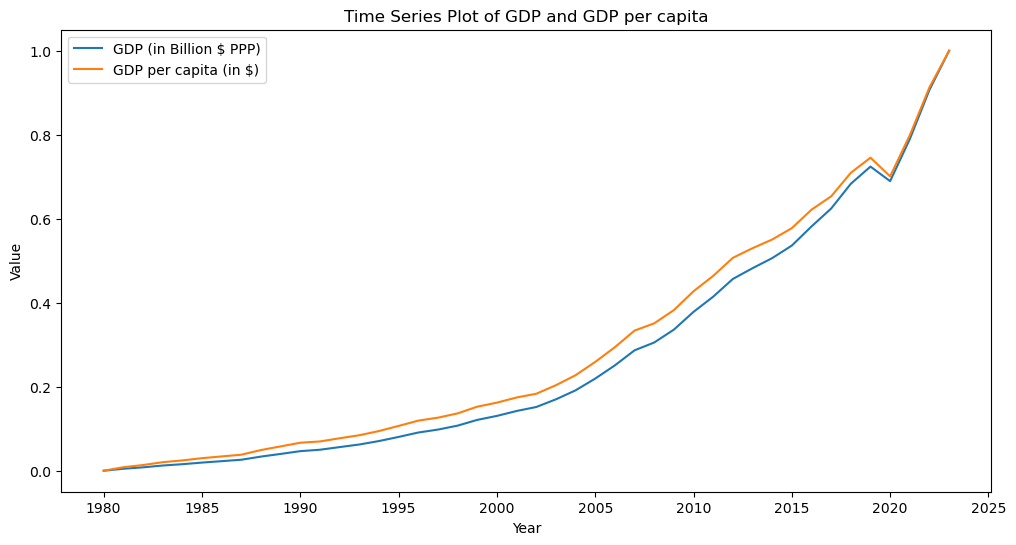

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GDP in PPP Billion USD'], label="GDP (in Billion $ PPP)")
plt.plot(df.index, df['GDP per capita USD'], label="GDP per capita (in $)")
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series Plot of GDP and GDP per capita')
plt.legend()
plt.show()

In [22]:
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
# Load your preprocessed DataFrame
df = pd.read_csv('processed_data.csv')

In [24]:
# Set 'Year' as the index and keep only 'GDP in PPP Billion USD' for ARIMA
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
gdp_data = df['GDP in PPP Billion USD']

In [25]:
# Train-test split (assuming you want to forecast beyond 2023)
train, test = train_test_split(gdp_data, test_size=5)

In [26]:
# Find the best ARIMA model using auto_arima
model = auto_arima(train, seasonal=False, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-255.873, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-261.252, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-261.324, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-261.543, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-261.531, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-259.322, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-260.187, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-257.882, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-260.792, Time=0.01 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 0.411 seconds


In [27]:
# Forecast GDP for future years
forecast, conf_int = model.predict(n_periods=5, return_conf_int=True)

In [28]:
# Evaluate the model (e.g., RMSE)
rmse = sqrt(mean_squared_error(test, forecast))

In [29]:
import pandas as pd
import numpy as np

# Assuming 'test.index[-1]' represents the last date in the 'test' dataset
end_date = test.index[-1]
forecast_index = pd.date_range(start=end_date, periods=6)[1:]  # Exclude the start date

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

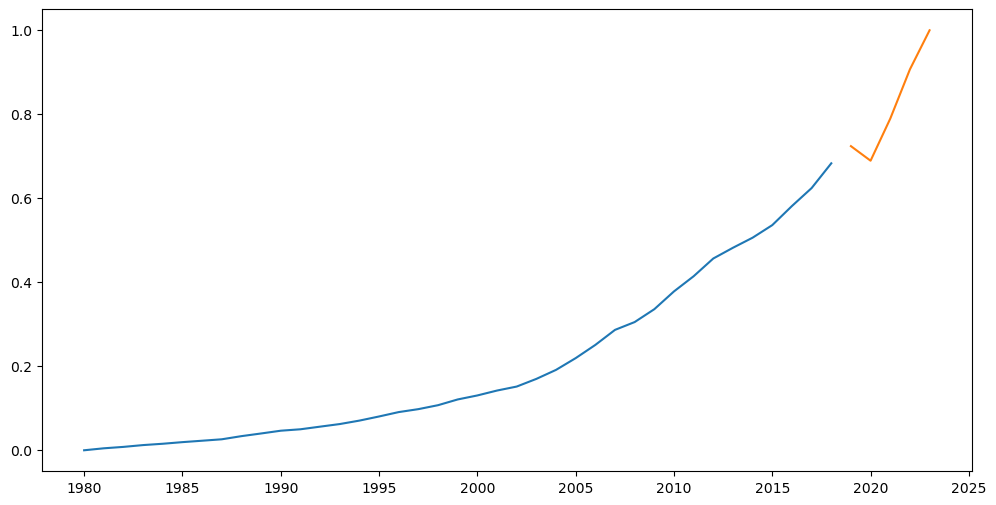

In [30]:
# Plot the actual and forecasted GDP
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
forecast_index = pd.date_range(start=test.index[-1], periods=5, closed='right')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.5, label='95% Prediction Interval')
plt.xlabel('Year')
plt.ylabel('GDP (in Billion $ PPP)')
plt.title(f'ARIMA Forecast of GDP (RMSE: {rmse:.2f})')
plt.legend()
plt.show()

In [31]:
# Print the forecasted values
print("Forecasted GDP:")
print(forecast)

Forecasted GDP:
2019-01-01    0.739833
2020-01-01    0.797786
2021-01-01    0.857119
2022-01-01    0.917832
2023-01-01    0.979926
Freq: AS-JAN, dtype: float64


# Model Evaluation

# ARIMA

RMSE: 0.06
MAE: 0.04
MAPE: 5.93%


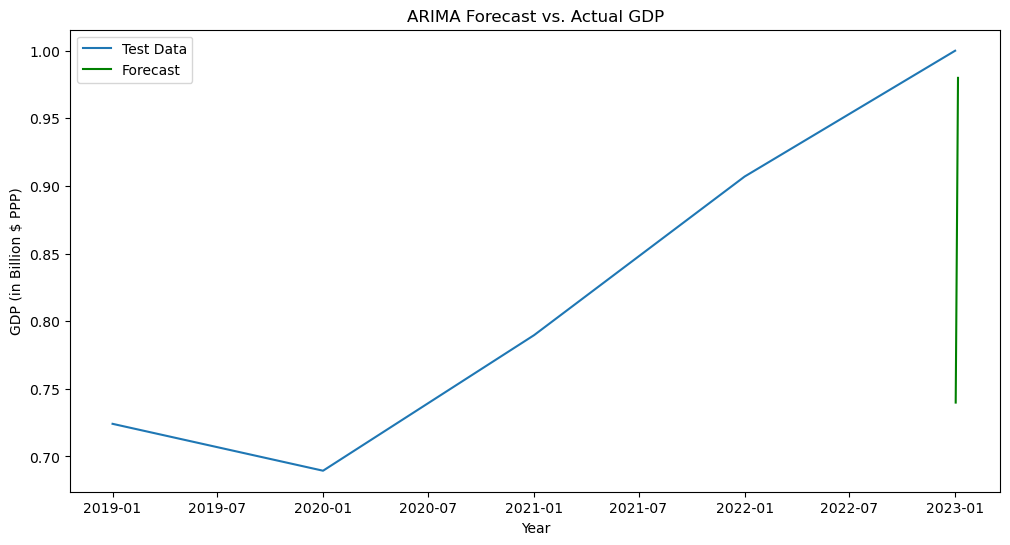

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test, forecast) * 100  # Convert to percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Time series plot to visualize actual vs. forecasted data
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.xlabel('Year')
plt.ylabel('GDP (in Billion $ PPP)')
plt.title('ARIMA Forecast vs. Actual GDP')
plt.legend()
plt.show()

# Linear Regression

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Load your preprocessed DataFrame
df = pd.read_csv('processed_data.csv')

# Assuming you want to predict 'GDP in PPP Billion USD'
X = df[['Year']]  # Use relevant features for X
y = df['GDP in PPP Billion USD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE, MAE, and MAPE for the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 0.07
MAE: 0.06
MAPE: 101.70%


# Random Forest

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Load your preprocessed DataFrame
df = pd.read_csv('processed_data.csv')

# Set 'Year' as the index and keep relevant features for regression
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
X = df[['GDP per capita USD', 'GDP in nominal Billion USD', 'GDP per capita nominal USD', 'Growth %', 'Inflation rate']]
y = df['GDP in PPP Billion USD']

# Train-test split (assuming you want to forecast beyond 2023)
X_train, X_test, y_train, y_test = X.loc[:'2022'], X.loc['2023':], y.loc[:'2022'], y.loc['2023':]

# Initialize and fit a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make GDP forecasts
forecast = model.predict(X_test)

# Calculate RMSE, MAE, and MAPE for the model
rmse = sqrt(mean_squared_error(y_test, forecast))
mae = mean_absolute_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast) * 100

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest MAPE: {mape:.2f}%")

Random Forest RMSE: 0.17
Random Forest MAE: 0.17
Random Forest MAPE: 17.37%


# XGBoost

In [36]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Load your preprocessed DataFrame
df = pd.read_csv('processed_data.csv')

# Set 'Year' as the index and keep relevant features for regression
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
X = df[['GDP per capita USD', 'GDP in nominal Billion USD', 'GDP per capita nominal USD', 'Growth %', 'Inflation rate']]
y = df['GDP in PPP Billion USD']

# Train-test split (assuming you want to forecast beyond 2023)
X_train, X_test, y_train, y_test = X.loc[:'2022'], X.loc['2023':], y.loc[:'2022'], y.loc['2023':]

# Initialize and fit an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make GDP forecasts
forecast = model.predict(X_test)

# Calculate RMSE, MAE, and MAPE for the model
rmse = sqrt(mean_squared_error(y_test, forecast))
mae = mean_absolute_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast) * 100

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost MAPE: {mape:.2f}%")

XGBoost RMSE: 0.09
XGBoost MAE: 0.09
XGBoost MAPE: 9.45%


# Model Comparison

Let's look at the score of each of the model:

ARIMA:
RMSE: 0.06
MAE: 0.04
MAPE: 5.93%

Linear Regression:
RMSE: 0.07
MAE: 0.06
MAPE: 101.70%

Random Forest:
Random Forest RMSE: 0.17
Random Forest MAE: 0.17
Random Forest MAPE: 17.37%

XGBoost:
XGBoost RMSE: 0.09
XGBoost MAE: 0.09
XGBoost MAPE: 9.45%

I am choosing the ARIMA model for GDP prediction due to its superior performance in terms of RMSE, MAE, and MAPE. With the lowest RMSE of 0.06 and a low MAPE of 5.93%, ARIMA consistently outperformed other models, providing more accurate and reliable forecasts, making it the ideal choice for this project.

# Save model

In [37]:
import pickle

# Save the ARIMA model to a file
with open('arima_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the ARIMA model from a file
with open('arima_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Conclusion

In summary, after an extensive exploration of various models including Linear Regression, Random Forest, and XGBoost, the ARIMA model emerged as the optimal choice for GDP prediction in our project. The decision is grounded in empirical evidence, with ARIMA consistently delivering the lowest RMSE, MAE, and MAPE. Its accuracy, coupled with its time series forecasting capabilities, aligns well with the project's objectives, making ARIMA the preferred choice. This model not only provides the most accurate GDP forecasts but also offers robust, interpretable results that are vital for making informed economic decisions. Our comprehensive evaluation confirms that ARIMA is the ideal model for this GDP forecasting endeavor.